The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this project, i'll build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path1 = 'C:/Users/DELL/Desktop/Git_Hub/Titanic Disaster/train.csv'
path2 = 'C:/Users/DELL/Desktop/Git_Hub/Titanic Disaster/test.csv'

In [5]:
data1 = pd.read_csv(path1)
data2 = pd.read_csv(path2)

In [6]:
women = data1.loc[data1.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men =data1.loc[data1.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [8]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data1['Age'].fillna(data1['Age'].mean(), inplace = True)
data2['Age'].fillna(data1['Age'].mean(), inplace = True)
data2['Fare'].fillna(data2['Fare'].mean(), inplace = True)

In [10]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


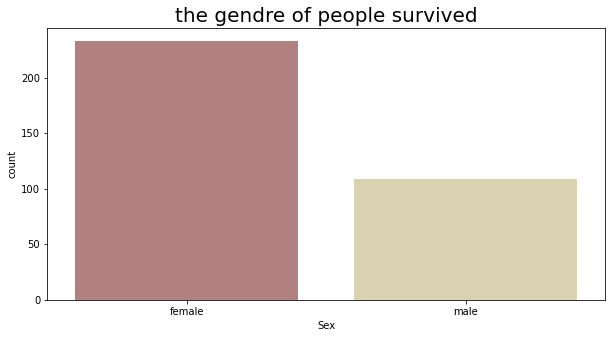

In [11]:
# comparison of the gender of people survived
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data1[data1['Survived']== 1]['Sex'], palette = 'pink')
plt.title('the gendre of people survived', fontsize = 20)
plt.show()

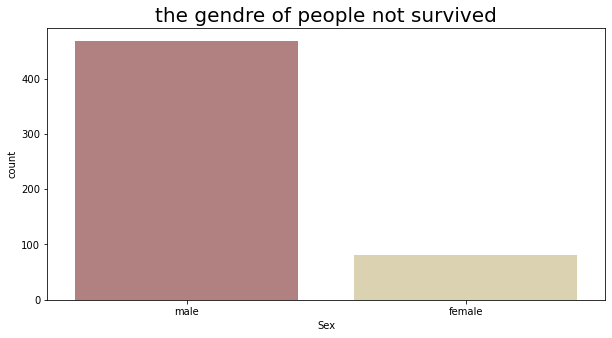

In [12]:
# comparison of the gender of people not survived
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data1[data1['Survived']== 0]['Sex'], palette = 'pink')
plt.title('the gendre of people not survived', fontsize = 20)
plt.show()

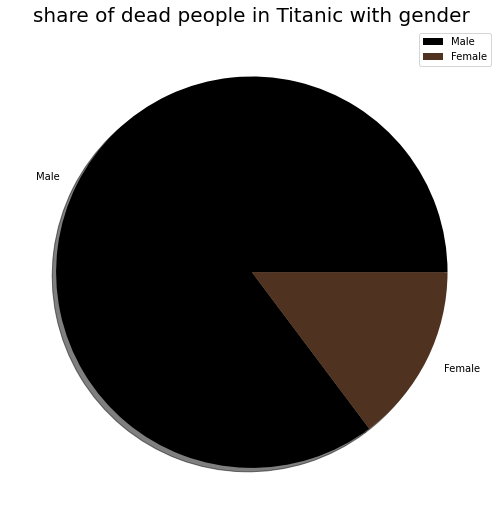

In [13]:
# plotting a pie chart to represent share of dead people in Titanic with gender

labels = ['Male', 'Female']
sizes = data1[data1['Survived']== 0]['Sex'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors,  shadow = True)
plt.title('share of dead people in Titanic with gender', fontsize = 20)
plt.legend()
plt.show()

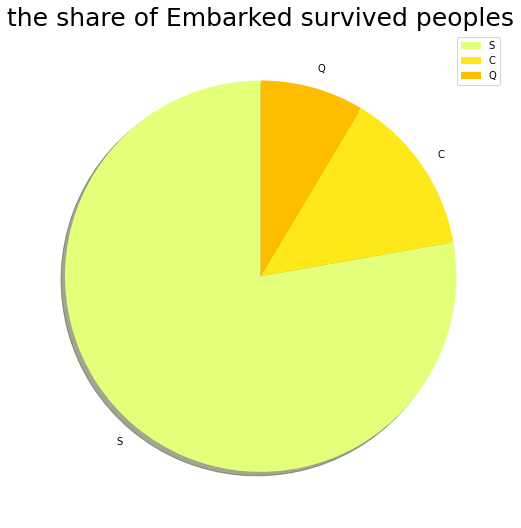

In [14]:
# plotting a pie chart to represent the share of Embarked survived people

size = data1[data1['Survived']== 0]['Embarked'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
labels = ['S', 'C', 'Q']
plt.pie(size,  colors = colors, labels = labels, shadow = True, startangle = 90)
plt.title('the share of Embarked survived peoples', fontsize = 25)
plt.legend()
plt.show()

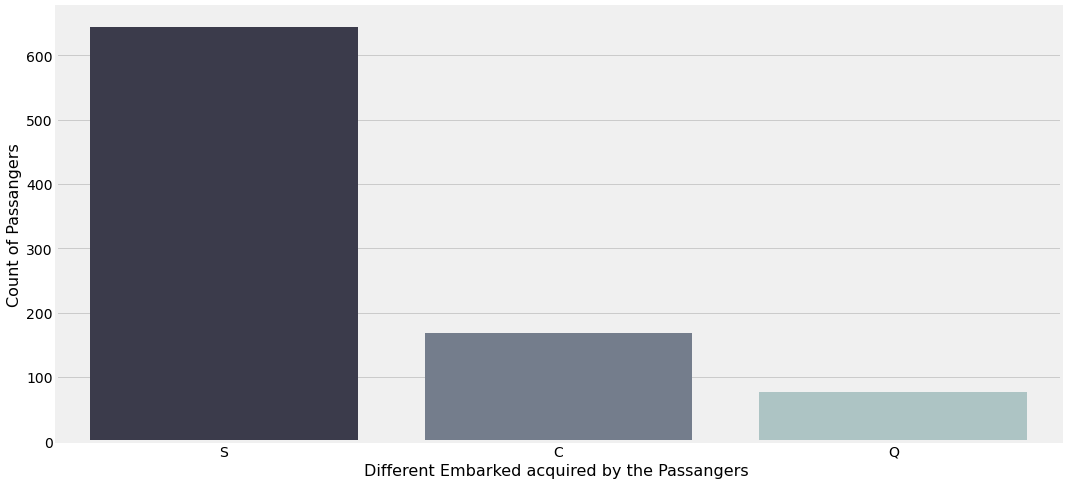

In [15]:
# different Embarked acquired by the Passangers 

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Embarked', data = data1, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Embarked acquired by the Passangers ', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Passangers', fontsize = 16)
plt.show()

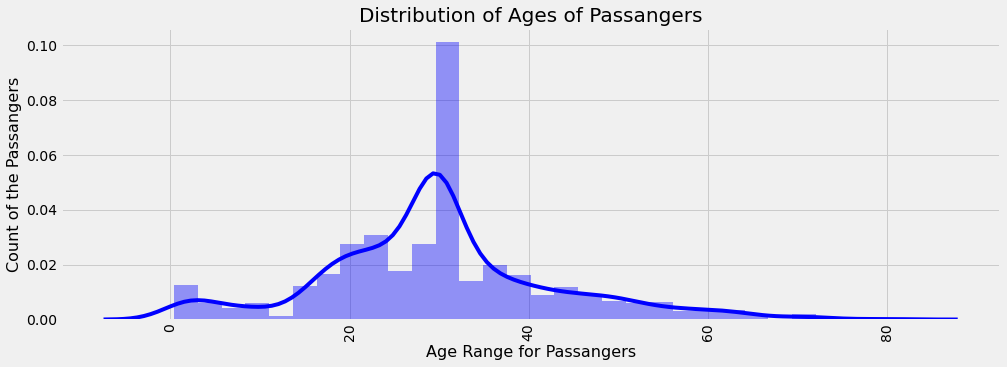

In [16]:
# Comparing the Passangers' Ages

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data1['Age'], color = 'blue')
plt.xlabel('Age Range for Passangers', fontsize = 16)
plt.ylabel('Count of the Passangers', fontsize = 16)
plt.title('Distribution of Ages of Passangers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

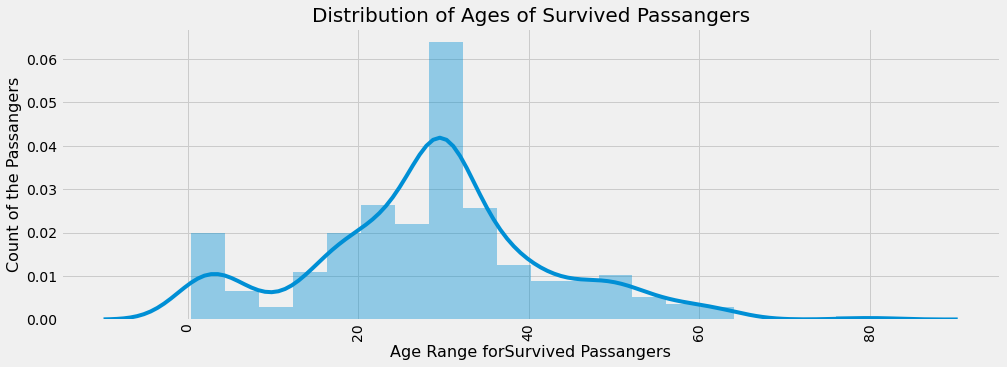

In [17]:
# Comparing the Survived Passangers' Ages

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data1[data1['Survived']==1]['Age'])
plt.xlabel('Age Range forSurvived Passangers', fontsize = 16)
plt.ylabel('Count of the Passangers', fontsize = 16)
plt.title('Distribution of Ages of Survived Passangers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

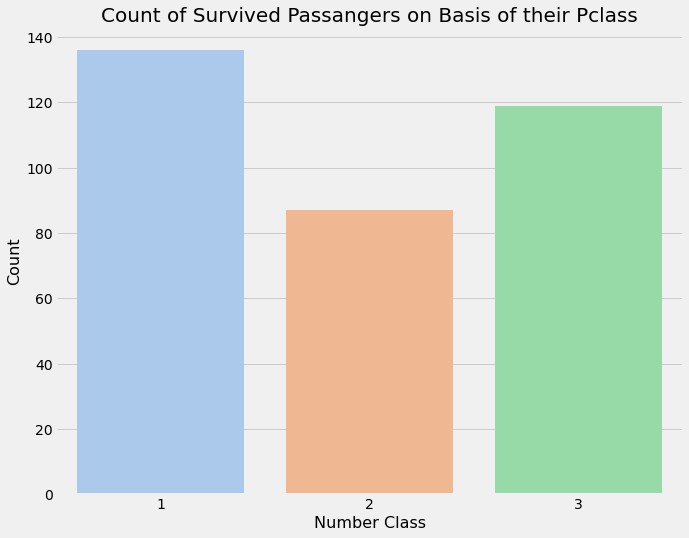

In [18]:
#  Pclass of Survived Passangers

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Pclass', data = data1[data1['Survived']==1], palette = 'pastel')
ax.set_title(label = 'Count of Survived Passangers on Basis of their Pclass', fontsize = 20)
ax.set_xlabel(xlabel = 'Number Class', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

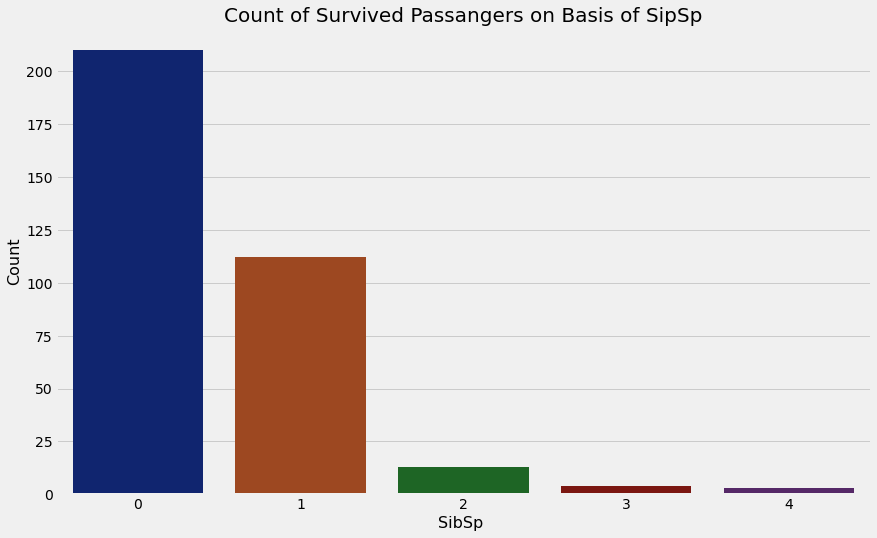

In [19]:
# SibSp of Survived Passangers

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'SibSp', data = data1[data1['Survived']==1], palette = 'dark')
ax.set_title(label = 'Count of Survived Passangers on Basis of SipSp', fontsize = 20)
ax.set_xlabel(xlabel = 'SibSp ', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

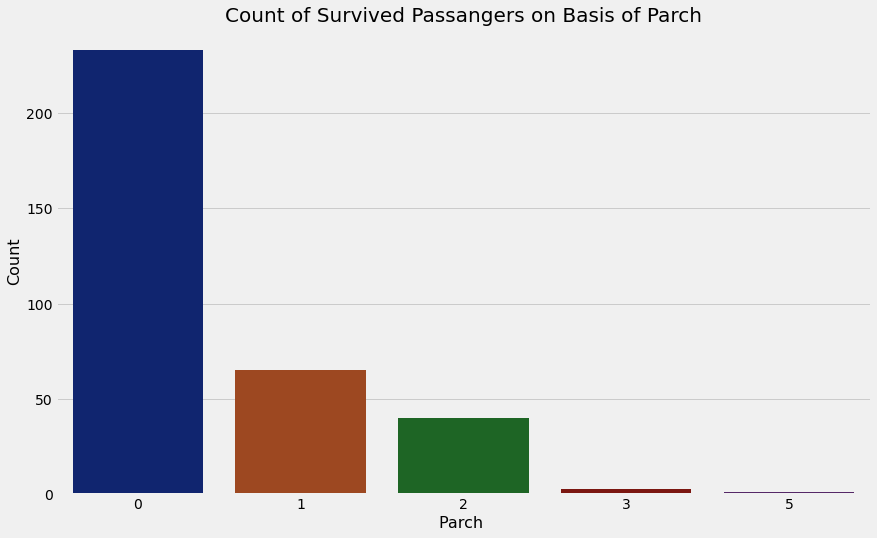

In [20]:
# Parch of Survived Passangers

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Parch', data = data1[data1['Survived']==1], palette = 'dark')
ax.set_title(label = 'Count of Survived Passangers on Basis of Parch', fontsize = 20)
ax.set_xlabel(xlabel = 'Parch ', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

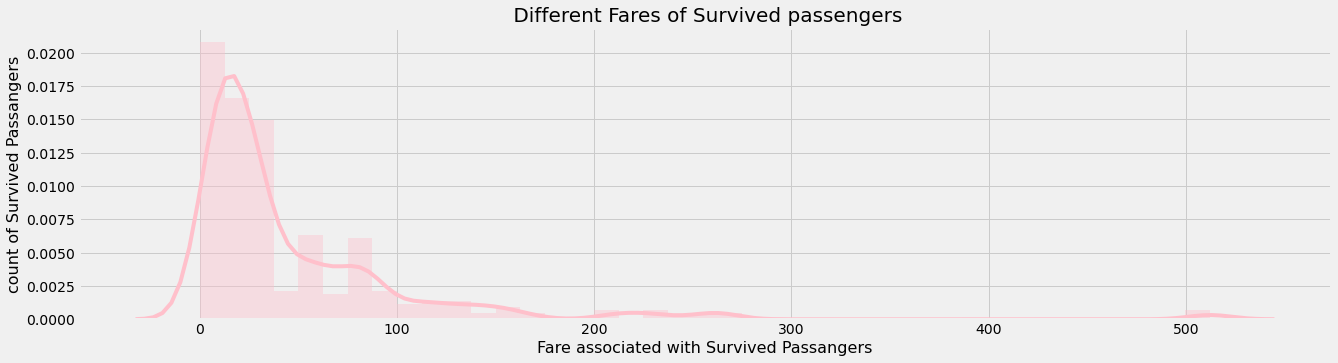

In [21]:
# To show Different Fares of Survived passengers

plt.figure(figsize = (20, 5))
sns.distplot(data1[data1['Survived']==1]['Fare'], color = 'pink')
plt.title(' Different Fares of Survived passengers', fontsize = 20)
plt.xlabel('Fare associated with Survived Passangers', fontsize = 16)
plt.ylabel('count of Survived Passangers', fontsize = 16)
plt.show()

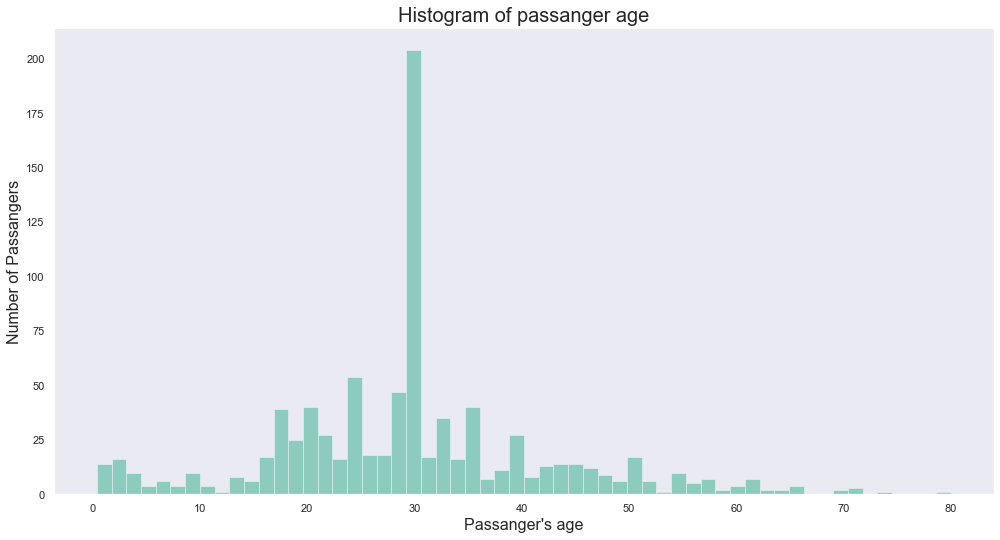

In [22]:
# To show that there are Passangers having same age
# Histogram: number of Passangers's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data1['Age']
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Passanger's age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Passangers', fontsize = 16)
ax.set_title(label = 'Histogram of passanger age', fontsize = 20)
plt.show()

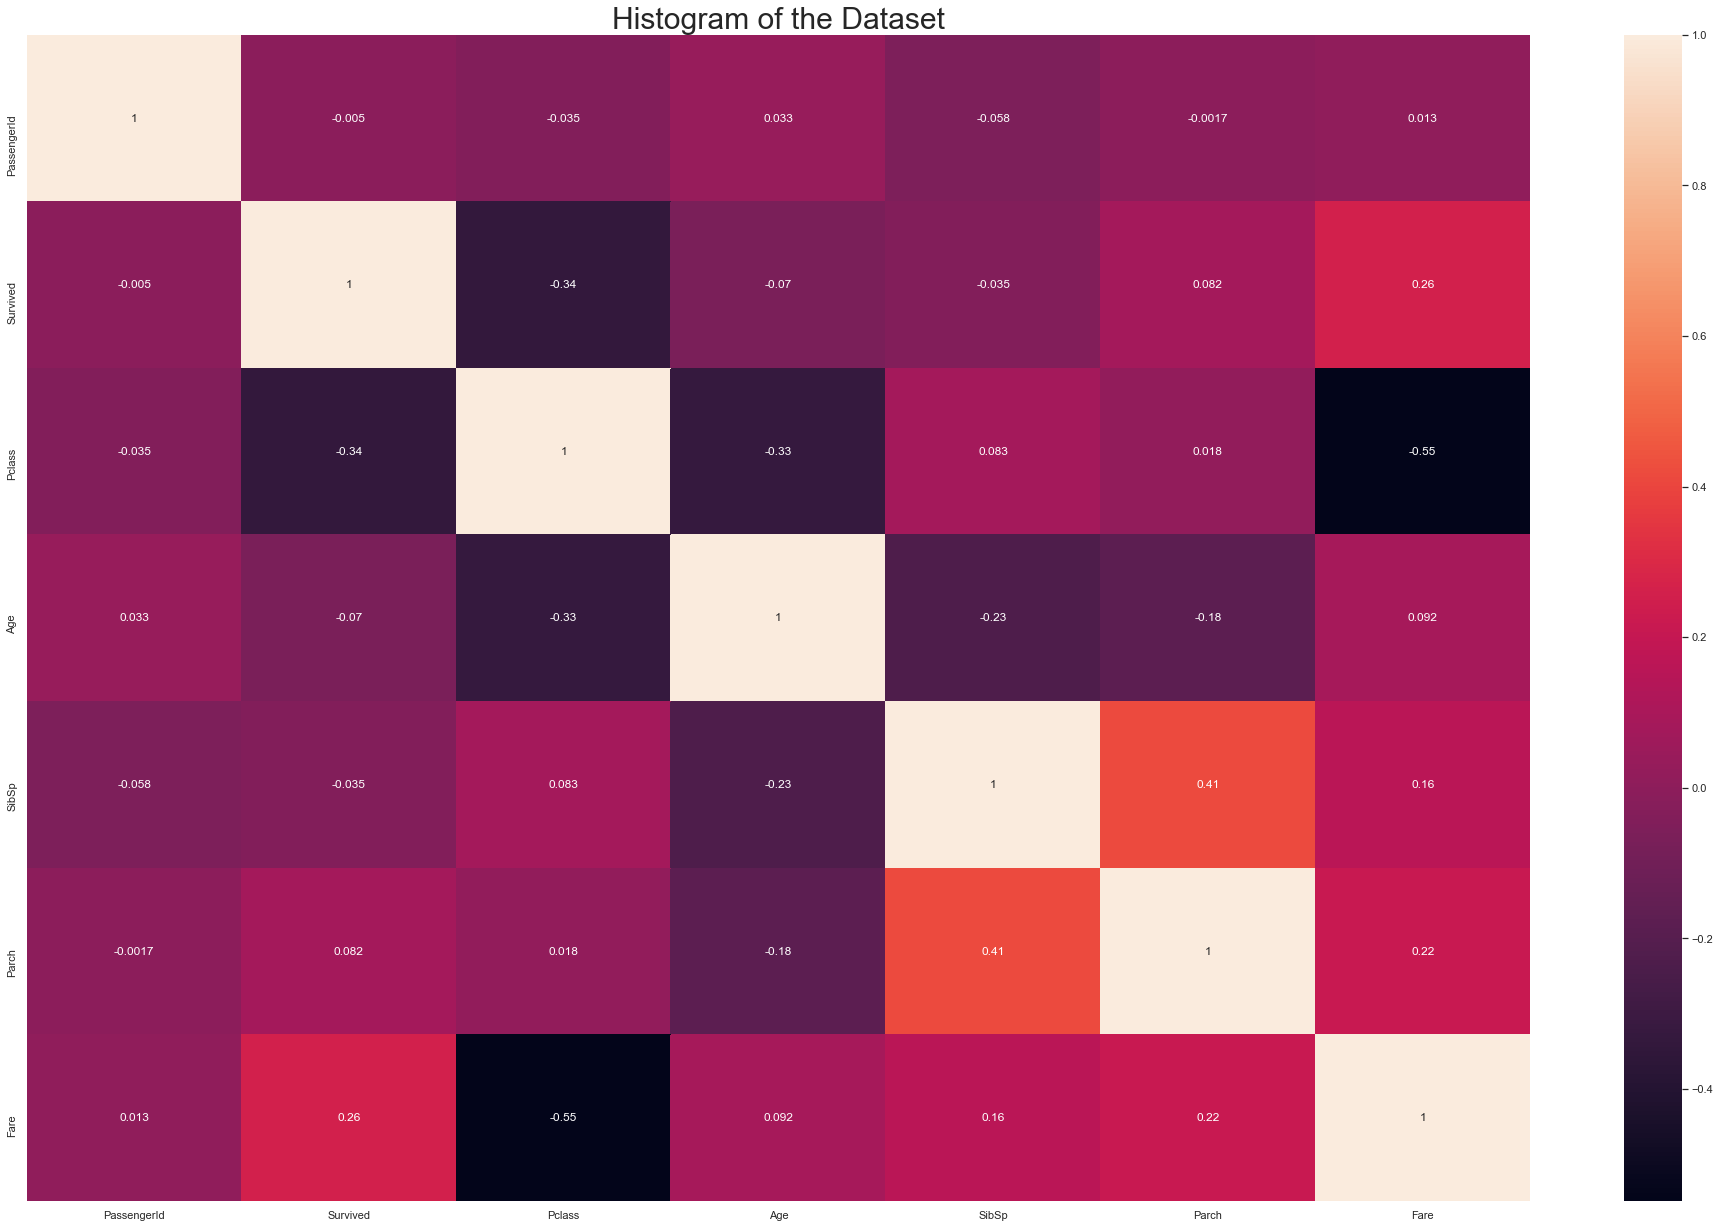

In [23]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data1.corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Sex'] = le.fit_transform(data1['Sex'])

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2['Sex'] = le.fit_transform(data2['Sex'])

In [26]:
features = ['Pclass','Sex',  'SibSp','Parch']

In [27]:
X_train = data1[features]
X_test = data2[features]
y_train = data1['Survived']

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [29]:
predictions = classifier.predict(X_test)

In [30]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
y_test = pd.read_csv('C:/Users/DELL/Desktop/Git_Hub/Titanic Disaster/gender_submission.csv')
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)

In [33]:
y_test=y_test['Survived'].values

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[266   0]
 [  0 152]]


1.0

In [35]:
output = pd.DataFrame({'PassengerId': data2.PassengerId ,'Survived': predictions})

filename = 'Titanic Predictions.csv'

output.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions.csv
